In [ ]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [ ]:
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

In [ ]:
df.columns = list(map(str, df.columns))
pd.options.display.max_rows = 155
df.dtypes
df.count()

In [ ]:
df.isnull().sum()

Site_code               0
Latitude                0
Longitude               0
Country                 0
Catchment_name          0
                       ..
Zingel asper            0
Squalius sp             0
Barbatula sp            0
Phoxinus sp             0
Iberochondrostoma_sp    0
Length: 154, dtype: int64

In [ ]:
df2 = df.dropna(how='all')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [ ]:
df2 = df.dropna(how='all', axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [ ]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB


In [ ]:
df.describe()

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,4975.000000,4402.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,428.072042,14.582432,3.062017,785.177935,941.823810,13.261950,6.211403,20.604503,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,342.912849,22.596125,0.567240,432.725266,292.497317,2.172315,2.662325,2.583101,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,1.000000,52.249944,373.366940,3.900000,-2.700000,11.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,142.000000,3.509500,3.000000,468.393265,677.473828,12.000000,4.300000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,375.000000,8.000000,3.000000,701.438554,968.898321,13.400000,6.400000,20.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,610.500000,17.170000,3.000000,1049.983330,1168.356822,14.600000,8.300000,22.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1851.000000,774.000000,4.000000,2545.546876,1739.000486,18.300000,12.500000,28.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,Nival,Permanent,1179,Siliceous,0.001,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,Nival,Permanent,1038,Siliceous,2.258,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,Pluvial,Permanent,636,Siliceous,0.263,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,Pluvial,Permanent,890,Calcareous,2.909,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,Groundwater,Permanent,872,Calcareous,3.530,...,0,0,0,0,0,0,1,0,0,0


Mean: 13.261950010328446
Standard Deviation: 2.1720906833670135
New Mean: -7.984615745785881e-16
New Standard Deviation: 0.9999999999999999
95% Confidence Interval: (-1.9599639845400547, 1.959963984540053)


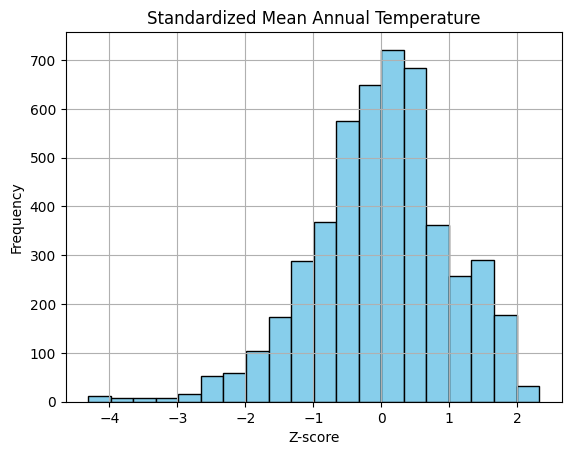

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
Temp_ann = df['temp_ann']
mean_temp_ann = np.mean(Temp_ann)
std_temp_ann = np.std(Temp_ann)
z_score_temp_ann = (Temp_ann - mean_temp_ann) / std_temp_ann
new_mean = np.mean(z_score_temp_ann)
new_std = np.std(z_score_temp_ann)
conf_interval = stats.norm.interval(0.95, loc=new_mean, scale=new_std)
print("Mean:", mean_temp_ann)
print("Standard Deviation:", std_temp_ann)
print("New Mean:", new_mean)
print("New Standard Deviation:", new_std)
print("95% Confidence Interval:", conf_interval)

# Plot the histogram
plt.hist(z_score_temp_ann, bins=20, color='skyblue', edgecolor='black')
plt.title('Standardized Mean Annual Temperature')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from scipy.stats import ttest_ind, mannwhitneyu
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")
x_data = df2[['temp_ann']]
y_data = df2['Salmo trutta fario']
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)
probabilities = log_reg.predict_proba(x_data)[:, 1]
df2['Probability'] = probabilities
threshold = 0.6
presence_data = df2[df2['Probability'] >= threshold]['temp_ann']
absence_data = df2[df2['Probability'] < threshold]['temp_ann']
t_stat, p_val_t = ttest_ind(presence_data, absence_data)
u_stat, p_val_u = mannwhitneyu(presence_data, absence_data)
alpha = 0.05
if p_val_t < alpha:
    print("Parametric test: Reject the null hypothesis. There is a significant difference in mean temperatures.")
else:
    print("Parametric test: Fail to reject the null hypothesis. There is no significant difference in mean temperatures.")

if p_val_u < alpha:
    print("Non-parametric test: Reject the null hypothesis. There is a significant difference in median temperatures.")
else:
    print("Non-parametric test: Fail to reject the null hypothesis. There is no significant difference in median temperatures.")

Parametric test: Reject the null hypothesis. There is a significant difference in mean temperatures.
Non-parametric test: Reject the null hypothesis. There is a significant difference in median temperatures.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
top_eight_catchments = df2['Catchment_name'].value_counts().nlargest(8).index
df_top_eight = df2[df2['Catchment_name'].isin(top_eight_catchments)]
f_statistic, p_value = stats.f_oneway(*[df_top_eight[df_top_eight['Catchment_name'] == c]['Elevation_mean_catch'] for c in df_top_eight['Catchment_name'].unique()])
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
tukey_results = pairwise_tukeyhsd(df_top_eight['Elevation_mean_catch'], df_top_eight['Catchment_name'])
print(tukey_results)


F-Statistic: 157.1736402882748
P-Value: 3.9710096360208786e-193
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
  Cantabrica        Douro   113.406 0.0002   37.6078  189.2042   True
  Cantabrica Galiza-Norte -219.0555    0.0 -280.5173 -157.5936   True
  Cantabrica   Galiza-Sul   32.9023 0.9841   -75.407  141.2115  False
  Cantabrica       Guadia -330.6163    0.0 -435.9711 -225.2614   True
  Cantabrica        Minho  258.0052    0.0  196.4999  319.5105   True
  Cantabrica      Mondego  -40.3519 0.9597 -153.0173   72.3134  False
  Cantabrica         Tejo -202.1506    0.0  -281.215 -123.0862   True
       Douro Galiza-Norte -332.4615    0.0 -399.2247 -265.6983   True
       Douro   Galiza-Sul  -80.5038 0.3568 -191.9068   30.8993  False
       Douro       Guadia -444.0223    0.0 -552.5552 -335.4893   True
       Douro        Minho 

Diversos obstáculos e restrições podem comprometer as conclusões derivadas dos testes realizados:

-Disparidade nos tamanhos da amostra


-Presença de outliers


-Não conformidade com a distribuição normal


-Falta de homogenidade
